In [1]:
#Importing necessary libraries-->

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Importing our dataset and checking first five rows-->

df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
#Checking the last two rows-->

df.tail(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [4]:
#Checking the general information of our dataset-->

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
#Cleaning the duration column to convert it into int dtype-->

df['duration']=df['duration'].apply(lambda x:str(x).split(' ')[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
#Duration column still hasn't converted into a numeric column, so converting the argument into numeric type-->

df['duration']=pd.to_numeric(df['duration'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8807 non-null   object 
 1   type          8807 non-null   object 
 2   title         8807 non-null   object 
 3   director      6173 non-null   object 
 4   cast          7982 non-null   object 
 5   country       7976 non-null   object 
 6   date_added    8797 non-null   object 
 7   release_year  8807 non-null   int64  
 8   rating        8803 non-null   object 
 9   duration      8804 non-null   float64
 10  listed_in     8807 non-null   object 
 11  description   8807 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 825.8+ KB


# Using Datetime-->

In [7]:
#Converting the date column into Datetime-->

df['date']=pd.to_datetime(df['date_added'])

In [8]:
#Creating subsets of date column-->

df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day

In [9]:
#Dropping the previous date columns-->

df.drop(columns=['date_added','date'], inplace=True)

In [10]:
#Checking for the missing values-->

df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
release_year       0
rating             4
duration           3
listed_in          0
description        0
year              10
month             10
day               10
dtype: int64

# Missing Value Treatment-->

In [11]:
#Imputing the missing values in these columns by using their respective modes-->

df['country'].fillna(df['country'].mode()[0], inplace=True)
df['year'].fillna(df['year'].mode()[0], inplace=True)
df['month'].fillna(df['month'].mode()[0], inplace=True)
df['day'].fillna(df['day'].mode()[0], inplace=True)

In [12]:
#Imputing the missing values in these columns by simply mentioning 'Unknown'-->

df['cast'].fillna('unknown', inplace=True)
df['rating'].fillna('unknown', inplace=True)
df['director'].fillna('unknown', inplace=True)

In [13]:
#Imputing the missing values in duration column by it's median value-->

df['duration'].fillna(df['duration'].median(), inplace=True)

In [14]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year            0
month           0
day             0
dtype: int64

# EDA-->

## Q1) Find out the show id & director for the title 'House of Cards'?

In [15]:
df[df['title']=='House of Cards']

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year,month,day
1059,s1060,TV Show,House of Cards,unknown,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,2018,TV-MA,6.0,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...,2021.0,4.0,14.0


## Q2) In which year highest num of TV shows & Movies were released?

In [16]:
df['year'].value_counts()

2019.0    2026
2020.0    1879
2018.0    1649
2021.0    1498
2017.0    1188
2016.0     429
2015.0      82
2014.0      24
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: year, dtype: int64

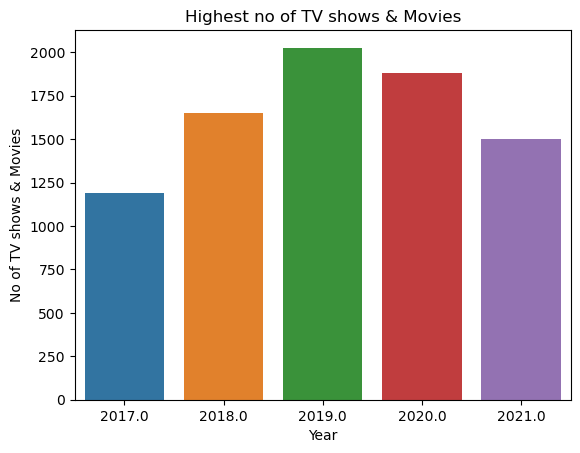

In [17]:
#Creating a Barplot for the same-->

sns.barplot(x=df['year'].value_counts().keys()[:5], y=df['year'].value_counts().values[:5], data=df)
plt.xlabel('Year')
plt.ylabel('No of TV shows & Movies')
plt.title('Highest no of TV shows & Movies')
plt.show()

## Q3) How many Movies & TV shows are in the df, show with the graph?

In [18]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

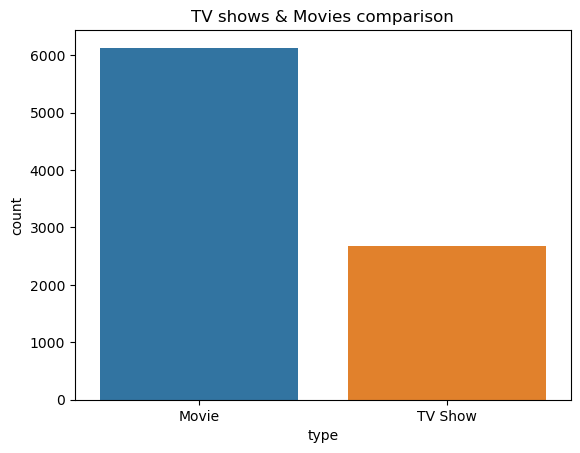

In [19]:
#Creating a Countplot to visualize these numbers-->

sns.countplot(x='type', data=df)
#plt.grid(True)
plt.title('TV shows & Movies comparison')
plt.show()

## Q4) Show the movies which were released in 2020

In [20]:
movies_2020=df[(df['year']==2020) & (df['type']=='Movie')]
movies_2020.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year,month,day
1470,s1471,Movie,Alaska Is a Drag,Shaz Bennett,"Martin L. Washington Jr., Maya Washington, Mat...",United States,2017,TV-MA,83.0,"Dramas, LGBTQ Movies","Tormented by bullies, an aspiring drag star wo...",2020.0,12.0,31.0
1471,s1472,Movie,Best of Stand-Up 2020,unknown,"Jerry Seinfeld, Leslie Jones, Taylor Tomlinson...",United States,2020,TV-MA,77.0,Stand-Up Comedy,"From Jerry Seinfeld to Leslie Jones, Kevin Har...",2020.0,12.0,31.0
1472,s1473,Movie,Bobby Jasoos,Samar Shaikh,"Vidya Balan, Ali Fazal, Supriya Pathak, Tanvi ...",India,2014,TV-14,116.0,"Comedies, Dramas, International Movies",With unlimited determination and zero field ex...,2020.0,12.0,31.0
1474,s1475,Movie,Tarung Sarung,Archie Hekagery,"Panji Zoni, Yayan Ruhian, Maizura, Cemal Faruk...",Indonesia,2020,TV-PG,116.0,"Action & Adventure, Dramas, Faith & Spirituality","Wealthy and spoiled, a young man finds somethi...",2020.0,12.0,31.0
1475,s1476,Movie,Too Handsome to Handle,Sabrina Rochelle Kalangie,"Ari Irham, Nikita Willy, Calvin Jeremy, Rachel...",Indonesia,2019,TV-14,106.0,"Comedies, Dramas, International Movies",Wary of the effects of his good looks on other...,2020.0,12.0,31.0


In [21]:
movies_2020.shape

(1284, 14)

## Q5) Show only the 'titles' of TV shows that were released in India only

In [22]:
indian_tvshows=df['title'][(df['country']=='India') & (df['type']=='TV Show')]
indian_tvshows.values

array(['Kota Factory', 'Chhota Bheem', 'Dharmakshetra',
       'Raja Rasoi Aur Anya Kahaniyan', 'Stories by Rabindranath Tagore',
       'The Creative Indians', 'Navarasa', 'Alma Matters',
       'Sab Jholmaal Hai', 'Lava Ka Dhaava', 'The Big Day',
       'Bombay Begums', 'Zindagi in Short', 'Pitta Kathalu',
       'Mighty Little Bheem: Kite Festival', 'Regiment Diaries',
       'Paava Kadhaigal', 'Bhaag Beanie Bhaag',
       'Fabulous Lives of Bollywood Wives', 'Mismatched',
       'Bad Boy Billionaires: India', 'Masaba Masaba', 'Little Singham',
       'Betaal', 'ChuChu TV Nursery Rhymes & Kids Songs (Hindi)',
       'Hasmukh', 'Akbar\xa0Birbal', 'Ladies Up', 'She',
       'Mighty Little Bheem: Festival of Colors', 'Taj Mahal 1989',
       'Jamtara - Sabka Number Ayega', 'Little Things',
       'Mighty Little Bheem: Diwali', 'College Romance',
       'Engineering Girls', 'Girls Hostel', 'Inmates', 'Bard of Blood',
       'Typewriter', 'Leila', 'Delhi Crime',
       'Cricket Fever: Mu

In [23]:
indian_tvshows.shape

(79,)

## Q6) Show top 10 directors who gave highest num of TV shows and movies to Netflix

In [24]:
top10_directors=df['director'].value_counts().head(11)
top10_directors

unknown                   2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Steven Spielberg            11
Name: director, dtype: int64

In [25]:
#Filtering out the 'unknown' record-->

top_10=top10_directors[top10_directors.index !='unknown']
top_10

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          11
Name: director, dtype: int64

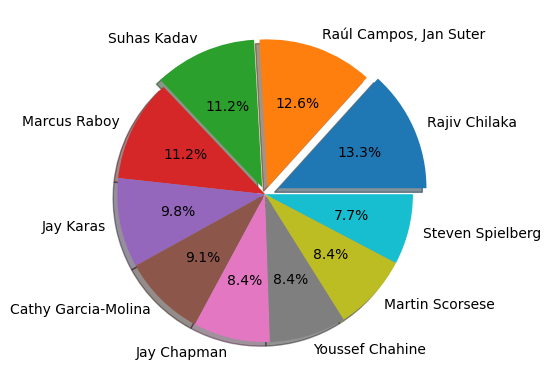

In [26]:
#Creating a Piechart to demonstrate this record-->

plt.pie(top_10.values, labels=top_10.keys(), autopct='%.1f%%', explode=(.1,0.05,0.05,0,0,0,0,0,0,0), shadow=True)
plt.show()

## Q7) Show all the movies where type is 'Movie' & listed in 'Comedy' or the Country is 'UK'

In [27]:
df[((df['type']=='Movie') & (df['listed_in'].str.contains('Comedies'))) | (df['country']=='United Kingdom')]

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year,month,day
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9.0,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021.0,9.0,24.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104.0,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021.0,9.0,24.0
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",United States,2021,TV-PG,91.0,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...,2021.0,9.0,22.0
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",United States,1996,TV-PG,161.0,"Comedies, International Movies",Newly divorced and denied visitation rights wi...,2021.0,9.0,21.0
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,TV-14,166.0,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021.0,9.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8791,s8792,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,2011,R,94.0,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...,2019.0,11.0,20.0
8793,s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,2005,PG,88.0,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...,2019.0,11.0,20.0
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,2014,TV-MA,131.0,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...,2019.0,12.0,31.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88.0,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0,1.0


In [28]:
df[(((df['type']=='Movie') & (df['listed_in']=='Comedies')) | (df['country']=='United Kingdom'))]

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year,month,day
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9.0,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021.0,9.0,24.0
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2010,PG-13,103.0,Comedies,Mourning the loss of their beloved junior high...,2021.0,9.0,20.0
32,s33,TV Show,Sex Education,unknown,"Asa Butterfield, Gillian Anderson, Ncuti Gatwa...",United Kingdom,2020,TV-MA,3.0,"British TV Shows, International TV Shows, TV C...",Insecure Otis has all the answers when it come...,2021.0,9.0,17.0
65,s66,TV Show,Numberblocks,unknown,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,2021,TV-Y,6.0,Kids' TV,"In a place called Numberland, math adds up to ...",2021.0,9.0,15.0
72,s73,TV Show,Jack Whitehall: Travels with My Father,unknown,"Jack Whitehall, Michael Whitehall",United Kingdom,2021,TV-MA,5.0,"British TV Shows, Docuseries, International TV...",Jovial comic Jack Whitehall invites his stuffy...,2021.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,s8741,TV Show,Wild Alaska,unknown,Dougray Scott,United Kingdom,2015,TV-PG,1.0,"British TV Shows, Docuseries, Science & Nature TV",The natural bounty of Alaska sustains its dive...,2017.0,3.0,31.0
8741,s8742,TV Show,Wild Arabia,unknown,Alexander Siddig,United Kingdom,2013,TV-PG,1.0,"British TV Shows, Docuseries, Science & Nature TV",The widely varied geology and dramatic landsca...,2017.0,3.0,31.0
8744,s8745,Movie,Williams,Morgan Matthews,unknown,United Kingdom,2017,TV-MA,105.0,"Documentaries, International Movies, Sports Mo...",This inspiring documentary charts the birth of...,2017.0,11.0,4.0
8758,s8759,TV Show,World's Busiest Cities,unknown,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,2017,TV-PG,1.0,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019.0,2.0,1.0


## Q8) Find out the num of movies & TV shows in which 'Tom Cruise' was cast

In [29]:
df[df['cast'].str.contains('Tom Cruise')]

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year,month,day
341,s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,1999,R,189.0,"Dramas, Independent Movies","Through chance, history and divine interventio...",2021.0,8.0,1.0
1254,s1255,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,1988,R,134.0,"Classic Movies, Dramas","Motivated by money, a selfish workaholic seeki...",2021.0,3.0,1.0


## Q9) What are the diff ratings defined by the Netflix?

In [30]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'unknown', 'TV-Y7-FV', 'UR'], dtype=object)

In [31]:
df['rating'].nunique()

18

## Q9.1) How many Movies got the TV-14 rating in Canada?

In [32]:
df[(df['type']=='Movie') & (df['rating']=='TV-14') & (df['country']=='Canada')].shape

(13, 14)

## Q9.2) How many TV shows got the R rating since 2018?

In [33]:
df[(df['type']=='TV Show') & (df['rating']=='R') & (df['year']>=2018)].shape

(1, 14)

## Q10) What's the max duration of a Movie/TV Show on Netflix?

In [34]:
max(df['duration'])

312.0

## Q11) Which country has the highest num of TV Shows?

In [35]:
df['country'][df['type']=='TV Show'].value_counts()[:1]

United States    1151
Name: country, dtype: int64

## Q12) How can we sort the Dataset by year?

In [36]:
df.sort_values(by='year', ascending=False).head(2)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year,month,day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,25.0
996,s997,Movie,HOMUNCULUS,Takashi Shimizu,"Go Ayano, Ryo Narita, Yukino Kishii, Anna Ishi...",Japan,2021,TV-MA,116.0,"Horror Movies, International Movies, Thrillers",Truth and illusion blurs when a homeless amnes...,2021.0,4.0,22.0


## Q13) Find all the instances where->

In [37]:
#A) Type is 'Movie' & listed_in is 'Dramas'
                 #OR
#B) Type is 'TV Show' & listed_in is 'Kids' TV'

df[((df['type']=='Movie') & (df['listed_in']=='Dramas')) | ((df['type']=='TV Show') & (df['listed_in']=="Kids' TV"))].shape

(358, 14)